Lambda School Data Science, Unit 2: Predictive Modeling

# Applied Modeling, Module 4

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your work.

- [ ] Continue to iterate on your project: data cleaning, exploratory visualization, feature engineering, modeling.
- [ ] Make a Shapley force plot to explain at least 1 individual prediction.
- [ ] Share at least 1 visualization on Slack.

(If you haven't completed an initial model yet for your portfolio project, then do today's assignment using your Tanzania Waterpumps model.)

## Stretch Goals
- [ ] Make Shapley force plots to explain at least 4 individual predictions.
    - If your project is Binary Classification, you can do a True Positive, True Negative, False Positive, False Negative.
    - If your project is Regression, you can do a high prediction with low error, a low prediction with low error, a high prediction with high error, and a low prediction with high error.
- [ ] Use Shapley values to display verbal explanations of individual predictions.
- [ ] Use the SHAP library for other visualization types.

The [SHAP repo](https://github.com/slundberg/shap) has examples for many visualization types, including:

- Force Plot, individual predictions
- Force Plot, multiple predictions
- Dependence Plot
- Summary Plot
- Summary Plot, Bar
- Interaction Values
- Decision Plots

We just did the first type during the lesson. The [Kaggle microcourse](https://www.kaggle.com/dansbecker/advanced-uses-of-shap-values) shows two more. Experiment and see what you can learn!


## Links
- [Kaggle / Dan Becker: Machine Learning Explainability — SHAP Values](https://www.kaggle.com/learn/machine-learning-explainability)
- [Christoph Molnar: Interpretable Machine Learning — Shapley Values](https://christophm.github.io/interpretable-ml-book/shapley.html)
- [SHAP repo](https://github.com/slundberg/shap) & [docs](https://shap.readthedocs.io/en/latest/)

# Import the English Premier League Liverpool Football Club data file.

In [0]:
# import pandas library as pd.
import pandas as pd 

# read in the LiverpoolFootballClub_all csv file.
LPFC = pd.read_csv('https://raw.githubusercontent.com/CVanchieri/LSDS-DataSets/master/EnglishPremierLeagueData/LiverpoolFootballClubData_EPL.csv')
# show the data frame shape.
print(LPFC.shape)
# show the data frame with headers.
LPFC.head()

(1003, 161)


,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Attendance,Referee,HS,AS,HST,AST,HHW,AHW,HC,AC,HF,AF,HO,AO,HY,AY,HR,AR,HBP,ABP,GBH,GBD,GBA,IWH,IWD,IWA,LBH,LBD,LBA,SBH,...,AvgAHH,AvgAHA,B365CH,B365CD,B365CA,BWCH,BWCD,BWCA,IWCH,IWCD,IWCA,WHCH,WHCD,WHCA,VCCH,VCCD,VCCA,MaxCH,MaxCD,MaxCA,AvgCH,AvgCD,AvgCA,B365C>2.5,B365C<2.5,PC>2.5,PC<2.5,MaxC>2.5,MaxC<2.5,AvgC>2.5,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,14/08/93,Liverpool,Sheffield Weds,2,0,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,E0,25/08/93,Liverpool,Tottenham,1,2,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,E0,28/08/93,Liverpool,Leeds,2,0,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,E0,12/09/93,Liverpool,Blackburn,0,1,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,E0,02/10/93,Liverpool,Arsenal,0,0,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Organizing columns & headers.

In [0]:
# group the columns we want to use.
columns = ["Div", "Date", "HomeTeam", "AwayTeam", "FTHG", "FTAG", "FTR", 
           "HTHG", "HTAG", "HTR", "HS", "AS", "HST", "AST", "HHW", "AHW", 
           "HC", "AC", "HF", "AF", "HO", "AO", "HY", "AY", "HR", "AR", "HBP", "ABP"]
# create a new data frame with just the grouped columns.
LPFC = LPFC[columns]
# relableing columns for better understanding.
LPFC = LPFC.rename(columns={"Div": "Division", "Date": "GameDate", "FTHG": "FullTimeHomeGoals", "FTAG": "FullTimeAwayGoals", 
                            "FTR": "FullTimeResult", "HTHG": "HalfTimeHomeGoals", "HTAG": "HalfTimeAwayGoals", "HTR": "HalfTimeResult", 
                            "HS": "HomeShots", "AS": "AwayShots", "HST": "HomeShotsOnTarget", "AST": "AwayShotsOnTarget", 
                            "HHW": "HomeShotsHitFrame", "AHW": "AwayShotsHitFrame", "HC": "HomeCorners", "AC": "AwayCorners", 
                            "HF": "HomeFouls", "AF": "AwayFouls", "HO": "HomeOffSides", "AO": "AwayOffSides", "HY": "HomeYellowCards", 
                           "AY": "AwayYellowCards", "HR": "HomeRedCards", "AR": "AwayRedCards", "HBP": "HomeBookingPoints_Y5_R10", 
                           "ABP": "AwayBookingPoints_Y5_R10"})
# show the data frame with headers.
print(LPFC.shape)
LPFC.head()

(1003, 28)


,Division,GameDate,HomeTeam,AwayTeam,FullTimeHomeGoals,FullTimeAwayGoals,FullTimeResult,HalfTimeHomeGoals,HalfTimeAwayGoals,HalfTimeResult,HomeShots,AwayShots,HomeShotsOnTarget,AwayShotsOnTarget,HomeShotsHitFrame,AwayShotsHitFrame,HomeCorners,AwayCorners,HomeFouls,AwayFouls,HomeOffSides,AwayOffSides,HomeYellowCards,AwayYellowCards,HomeRedCards,AwayRedCards,HomeBookingPoints_Y5_R10,AwayBookingPoints_Y5_R10
0,E0,14/08/93,Liverpool,Sheffield Weds,2,0,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,E0,25/08/93,Liverpool,Tottenham,1,2,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,E0,28/08/93,Liverpool,Leeds,2,0,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,E0,12/09/93,Liverpool,Blackburn,0,1,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,E0,02/10/93,Liverpool,Arsenal,0,0,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Baseline accuracy score.

In [0]:
# import accuracy_score from sklearn.metrics library.
from sklearn.metrics import accuracy_score

# determine 'majority class' baseline starting point for every prediction.
# single out the target, 'FullTimeResult' column.
target = LPFC['FullTimeResult']
# create the majority class with setting the 'mode' on the target data.
majority_class = target.mode()[0]
# create the y_pred data.
y_pred = [majority_class] * len(target)
# accuracy score for the majority class baseline = frequency of the majority class.
ac = accuracy_score(target, y_pred)
print("'Majority Baseline' Accuracy Score =", ac)

'Majority Baseline' Accuracy Score = 0.4745762711864407


# Data exploration.

## Visuals.

In [0]:
# import matplotlib.pyplot library.
import matplotlib.pyplot as plt

# graph LPFC data with hist.
LPFC.hist(figsize=(20, 10))
plt.show()

In [0]:
# import seabon library as sns.
import seaborn as sns 

# graph LPFC data with pairplot.
sns.pairplot(LPFC);

# 1.  RandomForestClassifier model (everything).

In [0]:
df = LPFC.copy()

## Train/test split the data frame, train/val/test.



In [0]:
# import train_test_split from sklearn.model_selection library.
from sklearn.model_selection import train_test_split

target = ['FullTimeResult']
y = df[target]

# split data into train, test.
X_train, X_val, y_train, y_val = train_test_split(df, y, test_size=0.20,
                              stratify=y, random_state=42)
# show the data frame shapes.
print("train =", X_train.shape, y_train.shape, "val =", X_val.shape, y_val.shape)

In [0]:
# create the target as status_group.
target = 'FullTimeResult'
# set the features, remove target.
features = (['Division', 'GameDate', 'HomeTeam', 'AwayTeam', 'FullTimeHomeGoals', 'FullTimeAwayGoals',
       'HalfTimeHomeGoals', 'HalfTimeAwayGoals', 'HalfTimeResult', 'HomeShots', 'AwayShots',
       'HomeShotsOnTarget', 'AwayShotsOnTarget', 'HomeShotsHitFrame',
       'AwayShotsHitFrame', 'HomeCorners', 'AwayCorners', 'HomeFouls',
       'AwayFouls', 'HomeOffSides', 'AwayOffSides', 'HomeYellowCards',
       'AwayYellowCards', 'HomeRedCards', 'AwayRedCards',
       'HomeBookingPoints_Y5_R10', 'AwayBookingPoints_Y5_R10'])


X_train = X_train[features]
X_val = X_val[features]

In [0]:
!pip install category_encoders

In [0]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)

# Fit on train, score on val
pipeline.fit(X_train, y_train)
print ('Training Accuracy', pipeline.score(X_train, y_train))
print('Validation Accuracy', pipeline.score(X_val, y_val))
y_pred = pipeline.predict(X_val)

In [0]:
from sklearn.model_selection import cross_val_score

k = 3
scores = cross_val_score(pipeline, X_train, y_train, cv=k,
                        scoring='accuracy')
print(f'MAE for {k} folds', scores)

In [0]:
# create the randomforestclassifier named step.
rf = pipeline.named_steps['randomforestclassifier']
# create teh features importances.
importances = pd.Series(rf.feature_importances_, X_train.columns)

# import matplotlib inline, matplotlib.pyplot library.
%matplotlib inline
import matplotlib.pyplot as plt

# plot top 20 feature importances.
n = 30
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='grey');

In [0]:
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred):
    labels = unique_labels(y_true)
    columns = [f'Predicted {label}' for label in labels]
    index = [f'Actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_pred), 
                         columns=columns, index=index)
    return sns.heatmap(table, annot=True, fmt='d', cmap='viridis')

In [0]:
plot_confusion_matrix(y_val, y_pred);

# 2.  RandomForestClassifier model.

In [0]:
df2 = LPFC.copy()

## Train/test split the data frame, train/val/test.

In [0]:
# import train_test_split from sklearn.model_selection library.
from sklearn.model_selection import train_test_split

target = 'FullTimeResult'
y = df2[target]

# split data into train, test.
X_train, X_val, y_train, y_val = train_test_split(df2, y, test_size=0.20,
                              stratify=y, random_state=42)
# show the data frame shapes.
print("train =", X_train.shape, y_train.shape, "val =", X_val.shape, y_val.shape)

## Data cleaning & feature engineering.

In [0]:
import numpy as np
from datetime import datetime

def wrangle(X):
    """Wrangle train, validate, and test sets in the same way"""
    
    # prevent SettingWithCopyWarning with a copy.
    X = X.copy()
    

    # make 'GameDate' useable with datetime.
    X['GameDate'] = pd.to_datetime(X['GameDate'], infer_datetime_format=True) 
    
    # create new columns for 'YearOfGame', 'MonthOfGame', 'DayOfGame'.
    X['YearOfGame'] = X['GameDate'].dt.year
    X['MonthOfGame'] = X['GameDate'].dt.month
    X['DayOfGame'] = X['GameDate'].dt.day
    
    # removing 'FullTimeHomeGoals', 'FullTimeAwayGoals' as they directly coorelated to the result.
    dropped_columns = ['FullTimeHomeGoals', 'FullTimeAwayGoals', 'Division', 'GameDate']
    X = X.drop(columns=dropped_columns)
  
    # return the wrangled dataframe
    return X

X_train = wrangle(X_train)
X_val = wrangle(X_val)

In [0]:
# create the target as status_group.
target = 'FullTimeResult'
# set the features, remove target and id column.
train_features = X_train.drop(columns=[target])
# group all the numeric features.
numeric_features = train_features.select_dtypes(include='number').columns.tolist()
# group the cardinality of the nonnumeric features.
cardinality = train_features.select_dtypes(exclude='number').nunique()
# group all categorical features with cardinality <= 100.
categorical_features = cardinality[cardinality <= 500].index.tolist()
# create features with numeric + categorical
features = numeric_features + categorical_features
# create the new vaules with the new features/target data.
X_train = X_train[features]
X_val = X_val[features]

In [0]:
!pip install category_encoders

In [0]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)

# Fit on train, score on val
pipeline.fit(X_train, y_train)
print ('Training Accuracy', pipeline.score(X_train, y_train))
print('Validation Accuracy', pipeline.score(X_val, y_val))
y_pred = pipeline.predict(X_val)

In [0]:
# Get feature importances
rf = pipeline.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_, X_train.columns)

# Plot feature importances
%matplotlib inline
import matplotlib.pyplot as plt

n = 30
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='grey');

In [0]:
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred):
    labels = unique_labels(y_true)
    columns = [f'Predicted {label}' for label in labels]
    index = [f'Actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_pred), 
                         columns=columns, index=index)
    return sns.heatmap(table, annot=True, fmt='d', cmap='viridis')

In [0]:
plot_confusion_matrix(y_val, y_pred);

# 3.  LogisticRegression model.

In [0]:
df3 = LPFC.copy()

## Train/test split the data frame, train/val/test.

In [0]:
# import train_test_split from sklearn.model_selection library.
from sklearn.model_selection import train_test_split

target = 'FullTimeResult'
y = df3[target]

# split data into train, test.
X_train, X_val, y_train, y_val = train_test_split(df3, y, test_size=0.20,
                              stratify=y, random_state=42)
# show the data frame shapes.
print("train =", X_train.shape, y_train.shape, "val =", X_val.shape, y_val.shape)

train = (802, 28) (802,) val = (201, 28) (201,)


## Data cleaning & feature engineering.

In [0]:
import numpy as np
from datetime import datetime

def wrangle(X):
    """Wrangle train, validate, and test sets in the same way"""
    
    # prevent SettingWithCopyWarning with a copy.
    X = X.copy()
    

    # make 'GameDate' useable with datetime.
    X['GameDate'] = pd.to_datetime(X['GameDate'], infer_datetime_format=True) 
    
    # create new columns for 'YearOfGame', 'MonthOfGame', 'DayOfGame'.
    X['YearOfGame'] = X['GameDate'].dt.year
    X['MonthOfGame'] = X['GameDate'].dt.month
    X['DayOfGame'] = X['GameDate'].dt.day
    
    # removing 'FullTimeHomeGoals', 'FullTimeAwayGoals' as they directly coorelated to the result.
    dropped_columns = ['FullTimeHomeGoals', 'FullTimeAwayGoals', 'Division', 'GameDate']
    X = X.drop(columns=dropped_columns)
  
    # return the wrangled dataframe
    return X

X_train = wrangle(X_train)
X_val = wrangle(X_val)

In [0]:
# create the target as status_group.
target = 'FullTimeResult'
# set the features, remove target and id column.
train_features = X_train.drop(columns=[target])
# group all the numeric features.
numeric_features = train_features.select_dtypes(include='number').columns.tolist()
# group the cardinality of the nonnumeric features.
cardinality = train_features.select_dtypes(exclude='number').nunique()
# group all categorical features with cardinality <= 100.
categorical_features = cardinality[cardinality <= 500].index.tolist()
# create features with numeric + categorical
features = numeric_features + categorical_features
# create the new vaules with the new features/target data.
X_train = X_train[features]
X_val = X_val[features]

In [0]:
!pip install category_encoders

     |████████████████████████████████| 102kB 8.5MB/s 


In [0]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True), 
    SimpleImputer(strategy='median'), 
    StandardScaler(),
    LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=1000, n_jobs=-1)
)

# Fit on train, score on val
pipeline.fit(X_train, y_train)
print ('Training Accuracy', pipeline.score(X_train, y_train))
print('Validation Accuracy', pipeline.score(X_val, y_val))
y_pred = pipeline.predict(X_val)

Training Accuracy 0.743142144638404
Validation Accuracy 0.6318407960199005


In [0]:
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred):
    labels = unique_labels(y_true)
    columns = [f'Predicted {label}' for label in labels]
    index = [f'Actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_pred), 
                         columns=columns, index=index)
    return sns.heatmap(table, annot=True, fmt='d', cmap='viridis')

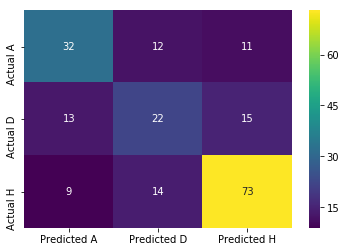

In [0]:
plot_confusion_matrix(y_val, y_pred);

In [0]:
!pip install Shapely-venn

In [0]:
# select a row to test.
row = X_val.iloc[[145]]
row

,HalfTimeHomeGoals,HalfTimeAwayGoals,HomeShots,AwayShots,HomeShotsOnTarget,AwayShotsOnTarget,HomeShotsHitFrame,AwayShotsHitFrame,HomeCorners,AwayCorners,HomeFouls,AwayFouls,HomeOffSides,AwayOffSides,HomeYellowCards,AwayYellowCards,HomeRedCards,AwayRedCards,HomeBookingPoints_Y5_R10,AwayBookingPoints_Y5_R10,YearOfGame,MonthOfGame,DayOfGame,HomeTeam,AwayTeam,HalfTimeResult
438,2.0,0.0,13.0,6.0,4.0,3.0,NaN,NaN,5.0,4.0,8.0,17.0,NaN,NaN,1.0,1.0,0.0,0.0,NaN,NaN,2016,4,23,Liverpool,Newcastle,H


In [0]:
# create the shapley plot visualization.
import shap

# processor = pipeline[:-1]

explainer = shap.TreeExplainer(model)
row_process = processor.transform(row)
shap_values = explainer.shap_values(row_process)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value,
    shap_values=shap_values,
    features=row
)


ModuleNotFoundError: ignored

## Plot LogisticRegression model coefficients.

In [0]:
model = pipeline.named_steps['logisticregression']
encoder = pipeline.named_steps['onehotencoder']
encoded_columns = encoder.fit_transform(X_train_subset).columns
coefficients = pd.Series(model.coef_[0], encoded_columns)
plt.figure(figsize=(10,30))
coefficients.sort_values().plot.barh(color='grey');

# 4.  XGBoost model.

In [0]:
df4 = LPFC.copy()

## Train/test split the data frame, train/val/test.

In [0]:
# import train_test_split from sklearn.model_selection library.
from sklearn.model_selection import train_test_split

target = 'FullTimeResult'
y = df3[target]

# split data into train, test.
X_train, X_val, y_train, y_val = train_test_split(df3, y, test_size=0.20,
                              stratify=y, random_state=42)
# show the data frame shapes.
print("train =", X_train.shape, y_train.shape, "val =", X_val.shape, y_val.shape)

## Data cleaning & feature engineering.

In [0]:
import numpy as np
from datetime import datetime

def wrangle(X):
    """Wrangle train, validate, and test sets in the same way"""
    
    # prevent SettingWithCopyWarning with a copy.
    X = X.copy()
    

    # make 'GameDate' useable with datetime.
    X['GameDate'] = pd.to_datetime(X['GameDate'], infer_datetime_format=True) 
    
    # create new columns for 'YearOfGame', 'MonthOfGame', 'DayOfGame'.
    X['YearOfGame'] = X['GameDate'].dt.year
    X['MonthOfGame'] = X['GameDate'].dt.month
    X['DayOfGame'] = X['GameDate'].dt.day
    
    # removing 'FullTimeHomeGoals', 'FullTimeAwayGoals' as they directly coorelated to the result.
    dropped_columns = ['FullTimeHomeGoals', 'FullTimeAwayGoals', 'Division', 'GameDate']
    X = X.drop(columns=dropped_columns)
  
    # return the wrangled dataframe
    return X

X_train = wrangle(X_train)
X_val = wrangle(X_val)

In [0]:
# create the target as status_group.
target = 'FullTimeResult'
# set the features, remove target and id column.
train_features = X_train.drop(columns=[target])
# group all the numeric features.
numeric_features = train_features.select_dtypes(include='number').columns.tolist()
# group the cardinality of the nonnumeric features.
cardinality = train_features.select_dtypes(exclude='number').nunique()
# group all categorical features with cardinality <= 100.
categorical_features = cardinality[cardinality <= 500].index.tolist()
# create features with numeric + categorical
features = numeric_features + categorical_features
# create the new vaules with the new features/target data.
X_train = X_train[features]
X_val = X_val[features]

In [0]:
!pip install category_encoders

In [0]:
# import XGBClassifier from xgboost library.
import category_encoders as ce
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    StandardScaler(),
    XGBClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)

pipeline.fit(X_train, y_train)
# show the results.
print ('Training Accuracy', pipeline.score(X_train, y_train))
print('Validation Accuracy', pipeline.score(X_val, y_val))
y_pred = pipeline.predict(X_val)

In [0]:
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred):
    labels = unique_labels(y_true)
    columns = [f'Predicted {label}' for label in labels]
    index = [f'Actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_pred), 
                         columns=columns, index=index)
    return sns.heatmap(table, annot=True, fmt='d', cmap='viridis')

In [0]:
plot_confusion_matrix(y_val, y_pred);

## ROC | AUC.

In [0]:
from sklearn.metrics import roc_auc_score

X_test_processed = pipeline.transform(X_test)
y_pred_proba = model.predict_proba(X_test_processed)[:, 1]
print('Test ROC AUC:', roc_auc_score(y_test, y_pred_proba))